# Example one
<center>$\left\{\begin{array}{l}y^{\prime \prime}+|y|=0 \\ y(x=0)=0.5 \\ y(x=4)=-1.5\end{array}\right.$</center>
Then we need to convert him to the following form.
<center>$\left\{\begin{array}{l}y_{0}^{\prime}=y_{1} \\ y_{1}^{\prime}=-\left|y_{0}\right| \\ y(x=0)-0.5=0 \\ y(x=4)+1.5=0\end{array}\right.$</center>


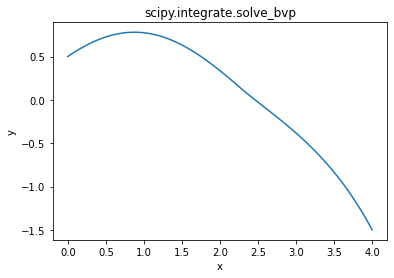

In [1]:
from scipy.integrate import odeint, solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def dydx(x, y):
    dy0 = y[1]
    dy1 = -abs(y[0])
    return np.vstack((dy0, dy1))


def boundCond(ya, yb):
    fa = 0.5  
    fb = -1.5 
    return np.array([ya[0]-fa,yb[0]-fb])

xa, xb = 0, 4  

xini = np.linspace(xa, xb, 11)  
yini = np.zeros((2, xini.size))  
res = solve_bvp(dydx, boundCond, xini, yini)  

xSol = np.linspace(xa, xb, 100)  
ySol = res.sol(xSol)[0] 

plt.plot(xSol, ySol, label='y')
# plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("scipy.integrate.solve_bvp")
plt.show()

# Example two
<center>$\left\{\begin{array}{l}\frac{d^{2} h}{d x^{2}}+[1-h] *\left[1+\left(\frac{d h}{d x}\right)^{2}\right]^{3 / 2}=0 \\ h(x=-1)=h(x=1)=0\end{array}\right.$</center>
It is the same as previous example
<center>$\left\{\begin{array}{l}h_{0}^{\prime}=h_{1} \\ h_{1}^{\prime}=\left(h_{0}-1\right) *\left[1+h_{1}^{2}\right]^{3 / 2} \\ h_{0}(x=-1)=h_{0}(x=1)=0\end{array}\right.$</center>


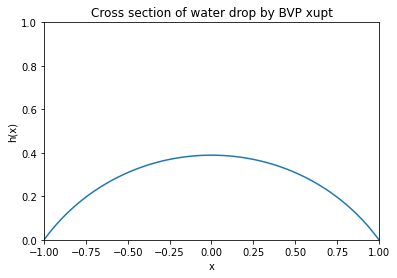

In [2]:
from scipy.integrate import odeint, solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def dhdx(x,h):
    dh0 = h[1]  
    dh1 = (h[0]-1)*(1+h[1]*h[1])**1.5  
    return np.vstack((dh0, dh1))

def boundCond(ha,hb):
    return np.array([ha[0],hb[0]])

xa, xb = -1, 1  
xini = np.linspace(xa, xb, 11)  
hini = np.zeros((2, xini.size))

res = solve_bvp(dhdx, boundCond, xini, hini)  

xSol = np.linspace(xa, xb, 100)  
hSol = res.sol(xSol)[0]  
plt.plot(xSol, hSol, label='h(x)')
plt.xlabel("x")
plt.ylabel("h(x)")
plt.axis([-1, 1, 0, 1])
plt.title("Cross section of water drop by BVP xupt")
plt.show()

# Example three
<center>$\frac{d^{2} y}{d x^{2}}+[\lambda-2 q \cos (2 x)] y=0$</center>
yep:
<center>$\left\{\begin{array}{l}y_{0}^{\prime}=y_{1} \\ y_{1}^{\prime}=-[\lambda-2 q \cos (2 x)] y_{0} \\ y_{0}(x=0)=1 \\ y_{1}(x=0)=0 \\ y_{1}(x=\pi)=0\end{array}\right.$</center>

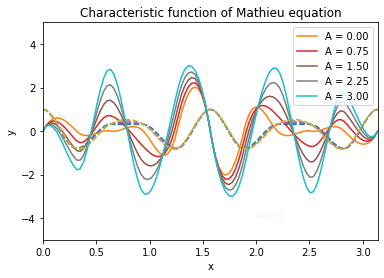

In [3]:
from scipy.integrate import odeint, solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def dydx(x, y, p):
    lam = p[0]
    q = 10
    dy0 = y[1]
    dy1 = -(lam-2*q*np.cos(2*x))*y[0]
    return np.vstack((dy0, dy1))

def boundCond(ya, yb, p):
    lam = p[0]
    return np.array([ya[0]-1,ya[0],yb[0]])

xa, xb = 0, np.pi  
xini = np.linspace(xa, xb, 11)  
xSol = np.linspace(xa, xb, 100)  

for k in range(5):
    A = 0.75*k
    y0ini = np.cos(8*xini)  
    y1ini = -A*np.sin(8*xini)  
    yini = np.vstack((y0ini, y1ini))  
    res = solve_bvp(dydx, boundCond, xini, yini, p=[10])  
    y0 = res.sol(xSol)[0] 
    y1 = res.sol(xSol)[1]  
    plt.plot(xSol, y0, '--')
    plt.plot(xSol, y1,'-',label='A = {:.2f}'.format(A))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Characteristic function of Mathieu equation")
plt.axis([0, np.pi, -5, 5])
plt.legend(loc='best')
plt.text(2,-4,"wuhu",color='whitesmoke')
plt.show()